In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk

import os
import ntpath
import re

from matplotlib.colors import ListedColormap

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
import os
import ntpath
import re
from matplotlib.colors import ListedColormap

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
import matplotlib as mpl
from matplotlib import rc, rcParams

from scipy.optimize import curve_fit
import matplotlib as mpl

In [4]:
# read the .out files and get gap values

gauss_outs = []
output_counter = 0
gaps_read_counter = 0
output_names = []

for filename in os.listdir():
    if filename.endswith(".out"):
        #print(os.path.join( filename))
        gauss_out = ntpath.basename(filename)
        gauss_outs.append(gauss_out)
        output_counter += 1
    elif filename.endswith(".csv"):
        Desired_gaps = os.path.join(filename)
    else:
        continue

In [5]:
gauss_outs

['CdC1CqdOrOC2CqOCdOrCCCC12_tddft.out',
 'OdC1CCdCCdC1CqOrdCqOrO_tddft.out',
 'CCqOrdNCqCCqdOrOrCqdOrO_tddft.out']

In [7]:
gaps_dft = []
for gauss in gauss_outs:
    convergence_check = 0
    gauss_path =  gauss
    f = open(gauss_path,'r')
    liness = f.readlines()
    #print (liness[-1])
    homo_count = 0
    #if '### All Done ###\n' in liness:
        #if liness[-2][1:7]=='Normal':
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            homo_count += 1
    counter = 0
    for count, line in enumerate(liness):
        if re.search('Alpha  occ. eigenvalues --', line, re.IGNORECASE):
            counter += 1
            if counter == homo_count:
                gaps_read_counter += 1
                convergence_check = 1
                homo_gap = liness[count].split()
                print (homo_gap)
                lumo_gap = liness[count+1].split()
                print (lumo_gap)
                output_names.append(gauss)
                #print (gap_line[2])
                # 1 Hurtree = 27.2114 (eV) 
                gaps_dft.append(27.2113825435*(float(lumo_gap[4]) - float (homo_gap[-1])))
        #else:
            #print ("gauss did not converged properly", gauss)
    #else:
        #print ("gauss did not converged properly", gauss)

['Alpha', 'occ.', 'eigenvalues', '--', '-0.33650', '-0.28684', '-0.27779', '-0.19662']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.09331', '-0.02232', '-0.01730', '0.00049', '0.01371']
['Alpha', 'occ.', 'eigenvalues', '--', '-0.27409']
['Alpha', 'virt.', 'eigenvalues', '--', '-0.03548', '-0.02979', '-0.02312', '-0.01152', '-0.00049']


In [8]:
output_names

['OdC1CCdCCdC1CqOrdCqOrO_tddft.out', 'CCqOrdNCqCCqdOrOrCqdOrO_tddft.out']

In [9]:
gaps_dft

[2.8112079305689845, 6.492907988704535]

In [10]:
len (gaps_dft)

2

In [14]:
output

NameError: name 'output' is not defined

In [12]:
print ("Total output files: ", output_counter)
print ("Total successfully read gaps: ", gaps_read_counter)
print ("all done")
#search through the excel file to find Desired gap
#ff = open(Desired_gaps,'r')
gen_desired = pd.read_csv(Desired_gaps)
#gen_desired = gen_desired.reset_index()

# get rid of .out form output files
output_names = [i.replace(".out","") for i in output_names]
print ("output names before conversion--------------------->\n", output_names)

for jj,ii in enumerate(output_names):
    p_counter = 0
    for kk,char in enumerate(ii):
        
        # insert "=" instead of "d", "#" instead of "t", '(' instead of q, ')' instead of r
        output_names[jj] = output_names[jj].replace("q","(")
        output_names[jj] = output_names[jj].replace("r",")")
        output_names[jj] = output_names[jj].replace("d","=")
        output_names[jj] = output_names[jj].replace("t","#")

print ("output names after conversion------------------------->\n ", output_names)

Total output files:  3
Total successfully read gaps:  2
all done
output names before conversion--------------------->
 ['OdC1CCdCCdC1CqOrdCqOrO_tddft', 'CCqOrdNCqCCqdOrOrCqdOrO_tddft']
output names after conversion------------------------->
  ['O=C1CC=CC=C1C(O)=C(O)O_#==f#', 'CC(O)=NC(CC(=O)O)C(=O)O_#==f#']


In [13]:
# choose the SMILES that we have DFT values

# create .csv file
dft_smiles_gap = {}
for smile in output_names:
    dft_smiles_gap['SMILES'] = output_names 
    dft_smiles_gap['DFT_gap'] = gaps_dft

    #output['Desired_gap'] = gen_desired['gap']

dft_smiles_gap = pd.DataFrame(dft_smiles_gap)
merged_output = pd.merge(gen_desired, dft_smiles_gap, on='SMILES') 

# !!!! Check which one is smaller
merged_output["RE_dft_des"] = np.abs((merged_output["DFT_gap"] - merged_output["des_gap"])/ merged_output["des_gap"]*100)
merged_output["RE_des_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["des_gap"])/ merged_output["DFT_gap"]*100)
merged_output["RE_dft_pred"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["pred_gap"]*100)
merged_output["RE_pred_dft"] = np.abs((merged_output["DFT_gap"] - merged_output["pred_gap"])/ merged_output["DFT_gap"]*100)

output = pd.DataFrame(merged_output)
output.to_csv('./output/output_{}'.format(Desired_gaps), index=False)

print ("average of RE: {} and Min: {} and Max: {}".\
       format(np.mean(np.abs(merged_output["RE_des_dft"])), min(merged_output["RE_des_dft"]), max(merged_output["RE_des_dft"])))
print ("Total samples wrote in the output: ",len(output))

KeyError: 'des_gap'

In [16]:
dft_smiles_gap

,SMILES,DFT_gap
0,O=C1CC=CC=C1C(O)=C(O)O_#==f#,2.811208
1,CC(O)=NC(CC(=O)O)C(=O)O_#==f#,6.492908


In [9]:
## Statistics  (# DFT=True value, Des=prediction)

# total # of samples
N = len(merged_output["des_gap"])
print ("number of samples: ", N)
# Explained Variance R2 from sklearn.metrics.explained_variance_score
explained_variance_R2_DFT_des = explained_variance_score(merged_output["DFT_gap"], merged_output["des_gap"])
print ("explained_varice_R2_DFT_des", explained_variance_R2_DFT_des)

# mean absolute error 
MAE_DFT_des = mean_absolute_error(merged_output["DFT_gap"], merged_output["des_gap"])
print ("MAE_DFT_des", MAE_DFT_des)
MAE_DFT_des_=0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    MAE_DFT_des_ = MAE_DFT_des_ + abs(des-dft)
MAE_DFT_des = MAE_DFT_des_/N
print ("MAE_DFT_des_manuallycal:", MAE_DFT_des)
# Fractioned MAE, more normalized
Fractioned_MAE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des +  abs(des-dft)/des
Fractioned_MAE_DFT_des = Fractioned_MAE_DFT_des/N
print ("FMAE_DFT_des_manuallycal", Fractioned_MAE_DFT_des)

# root mean squared error (RMSE), sqrt(sklearn ouputs MSE)
RMSE_DFT_des = mean_squared_error(merged_output["DFT_gap"], merged_output["des_gap"])**0.5
print ("RMSE_DFT_des", RMSE_DFT_des)

Fractioned_RMSE_DFT_des = 0
for dft, des in zip(merged_output["DFT_gap"], merged_output["des_gap"]):
    Fractioned_RMSE_DFT_des = Fractioned_RMSE_DFT_des + ((des-dft)/des)**2
Fractioned_RMSE_DFT_des = (Fractioned_RMSE_DFT_des/N)**0.5
print ("Fractioned_RMSE_DFT_des", Fractioned_RMSE_DFT_des)



number of samples:  92
explained_varice_R2_DFT_des -0.1898558710168019
MAE_DFT_des 1.225226521472485
MAE_DFT_des_manuallycal: 1.2252265214724847
FMAE_DFT_des_manuallycal 0.1489882854326418
RMSE_DFT_des 1.5087315791115972
Fractioned_RMSE_DFT_des 0.18268543081565694


In [10]:
plt.rcParams["font.family"] = "Arial"

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42

mpl.font_manager.FontManager()


# make the numbers on axis bold
rc('font', weight='bold')

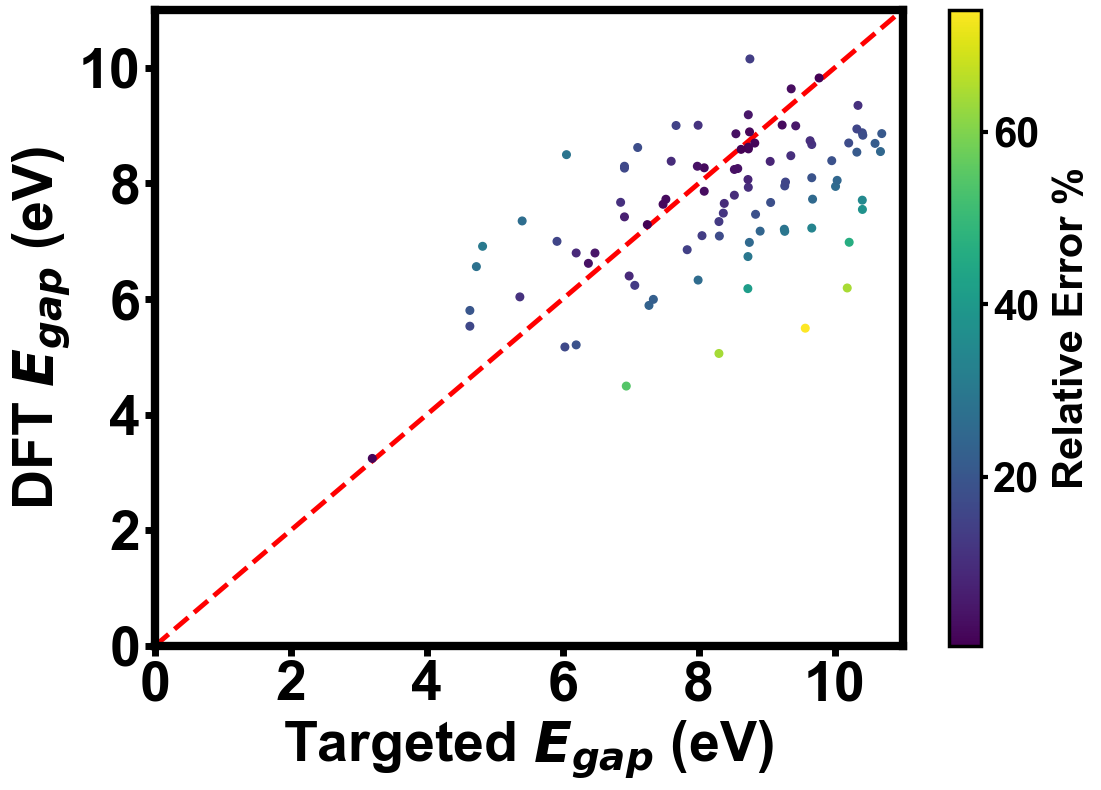

In [11]:
label_fontsize = 40
fig_size_x = 14*0.8
fig_size_y = 10*0.8
axis_size = 40
marker_size = 30

gap_range = (0, 11)
cMap = ListedColormap(['white', 'green', 'blue','red'])

Desired_gap = output["des_gap"]
DFT_gap = output["DFT_gap"]


col = output['RE_des_dft']
col_orig = np.copy(col)

mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (fig_size_x, fig_size_y))
plt.scatter(Desired_gap, DFT_gap, s=marker_size, c=col_orig)

ax.tick_params(axis='both', which='major', labelsize=25)

plt.xlabel(r'Targeted $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)
plt.ylabel(r'DFT $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)

ax.tick_params(axis='both', which='major', labelsize=axis_size, width=5, length=7)
[i.set_linewidth(6) for i in ax.spines.values()]

plt.xlim(gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
ax.grid(False)

lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)


cbar = plt.colorbar(shrink=1)

#cbar.ax.set_ticks(20)

plt.xticks ((0, 2, 4, 6, 8, 10))
plt.yticks ((0, 2, 4, 6, 8, 10))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_Des.png', dpi = 500, bbox_inches='tight')

In [12]:
output.loc[output['SMILES']=='O=C(S)CSC1SC1C1CCC1']

,SMILES,des_gap,pred_gap,Err_pred_des,AE,DFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
9,O=C(S)CSC1SC1C1CCC1,4.6343,5.815133,0.254803,1.180833,5.529897,19.325403,16.195548,4.905055,5.15806


In [14]:
(5.529897-4.6343)/4.6343

0.19325399736745583

[0.32608696]
[0.35869565]
[0.31521739]


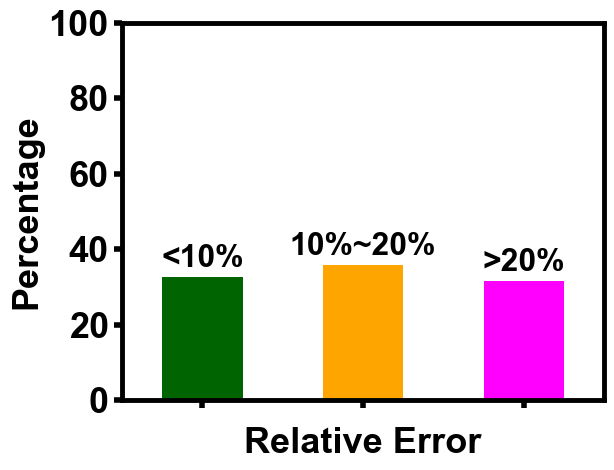

In [17]:
# two ways: divided by desired or DFT values
# RE_des_dft
re_less_10 = np.sum(output['RE_des_dft'].values <= 10)
print (re_less_10/output['RE_des_dft'].shape)

re_less_20_big_10 = np.sum( (output['RE_des_dft'].values > 10) &  (output['RE_des_dft'].values <= 20) )
print (re_less_20_big_10/output['RE_des_dft'].shape)

re_big_20 = np.sum(output['RE_des_dft'].values > 20)
print (re_big_20/output['RE_des_dft'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])



rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_des.jpeg', dpi=500, bbox_inches='tight')

[0.35869565]
[0.39130435]
[0.25]


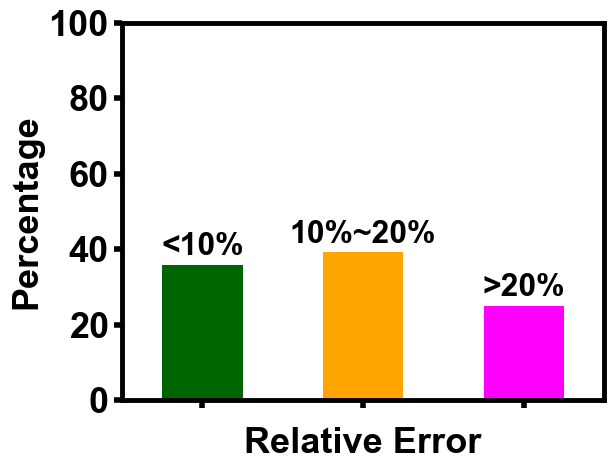

In [18]:
# two ways: divided by desired or DFT values
# RE_dft_des
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_dft_des'].values <= 10)
print (re_less_10/output['RE_dft_des'].shape)

re_less_20_big_10 = np.sum( (output['RE_dft_des'].values > 10) &  (output['RE_dft_des'].values <= 20) )
print (re_less_20_big_10/output['RE_dft_des'].shape)

re_big_20 = np.sum(output['RE_dft_des'].values > 20)
print (re_big_20/output['RE_dft_des'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])



rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_des.jpeg', dpi=500, bbox_inches='tight')

10.15365528228159
92


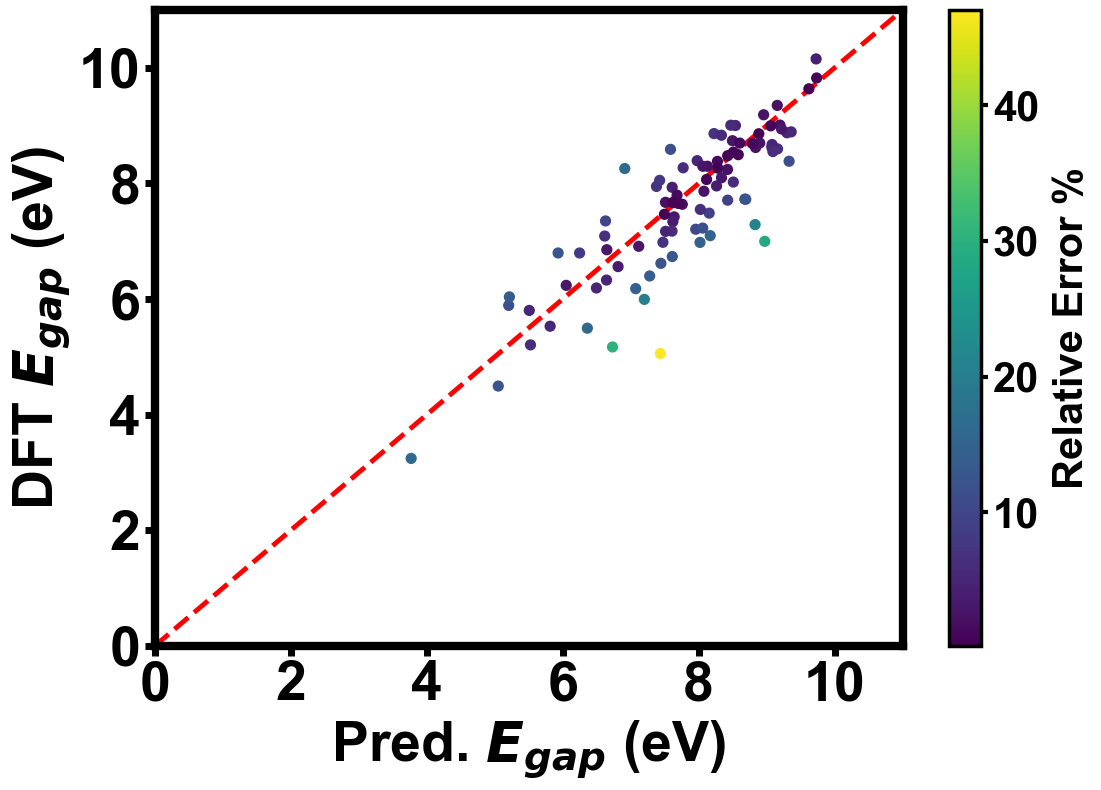

In [14]:
# make the numbers on axis bold

#rc('font', weight='bold')

gap_range = (0, 11)
pred_gap_range = (0, 11)
cMap = ListedColormap(['white', 'green', 'blue','red'])

predicted_gap = output["pred_gap"]
DFT_gap = output["DFT_gap"]
coll = output["RE_pred_dft"]


col = np.abs((DFT_gap-predicted_gap)/DFT_gap*100)
col_orig = np.copy(col)

#plt.figure(figsize = (8, 7))
#mpl.rcParams['axes.linewidth'] = 2.5
fig, ax = plt.subplots(figsize = (fig_size_x, fig_size_y))

plt.scatter(predicted_gap, DFT_gap, s=marker_size, c=coll)
ax.tick_params(axis='both', which='major', labelsize=40, width=5, length=7)

plt.xlabel(r'Pred. $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)
plt.ylabel(r'DFT $E_{gap}$ (eV)', fontsize=label_fontsize, 
           fontname='Arial', fontweight="bold", labelpad=5)

plt.xlim(pred_gap_range)
plt.ylim(gap_range)
# how many numbers on the axes, delta
ax.xaxis.set_major_locator(tk.MultipleLocator(7))
ax.yaxis.set_major_locator(tk.MultipleLocator(7))
[i.set_linewidth(6) for i in ax.spines.values()]
lims=[gap_range[0], gap_range[1]]
plt.plot(lims, lims, '--', linewidth=3.5, c='red', alpha=1, zorder=0)

cbar = plt.colorbar(shrink=1)

plt.xticks ((0, 2, 4, 6, 8, 10))
plt.yticks ((0, 2, 4, 6, 8, 10))

#cbar.set_ticks(loacator)
cbar.ax.set_ylabel('Relative Error %', fontsize=30, fontname='Arial', fontweight='bold', labelpad=10)
cbar.ax.tick_params(axis='both', which='major', labelsize=30,  width=3, length=5)

#cbar.ax.yaxis.set_major_locator(tk.MultipleLocator(0.5))
#cbar.solids.set_edgecolor("face")
#plt.draw()
plt.tight_layout()
plt.savefig('DFT_pred.png', dpi = 500, bbox_inches='tight')

print (np.max(DFT_gap))
print (len(output["DFT_gap"]))

In [43]:
r2_score( output['des_gap'], 1.1*output['DFT_gap'],)

0.2561555437685171

In [20]:
output.loc[output['SMILES']=='O=C(S)CSC1SC1C1CCC1']

,SMILES,des_gap,pred_gap,Err_pred_des,AE,DFT_gap,RE_dft_des,RE_des_dft,RE_dft_pred,RE_pred_dft
9,O=C(S)CSC1SC1C1CCC1,4.6343,5.815133,0.254803,1.180833,5.529897,19.325403,16.195548,4.905055,5.15806


[0.7311828]
[0.20430108]
[0.06451613]


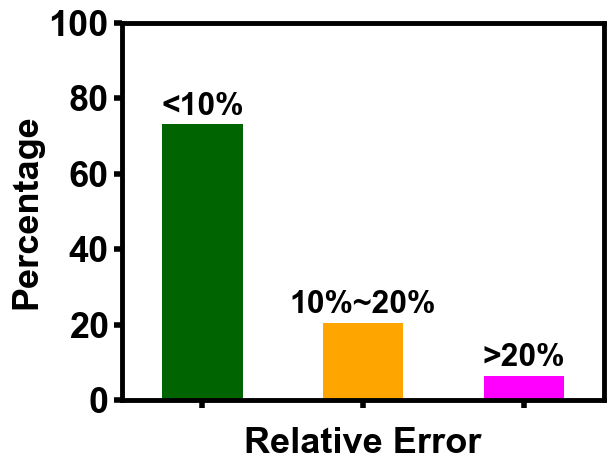

In [17]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_pred_dft'].values <= 10)
print (re_less_10/output['RE_pred_dft'].shape)

re_less_20_big_10 = np.sum( (output['RE_pred_dft'].values > 10) &  (output['RE_pred_dft'].values <= 20) )
print (re_less_20_big_10/output['RE_pred_dft'].shape)

re_big_20 = np.sum(output['RE_pred_dft'].values > 20)
print (re_big_20/output['RE_pred_dft'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])

rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_pred.jpeg', dpi=500, bbox_inches='tight')

[0.73913043]
[0.22826087]
[0.0326087]


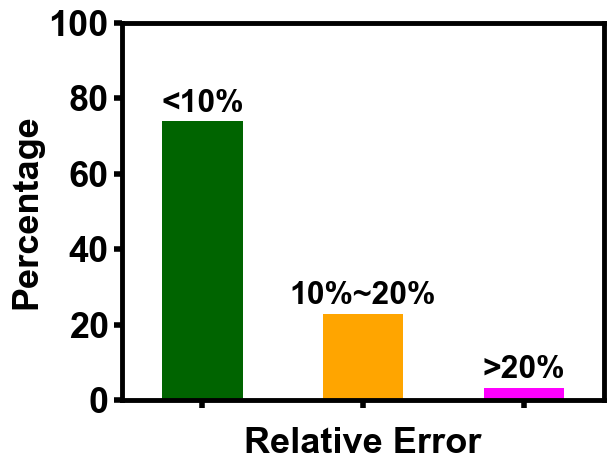

In [21]:
# make the numbers on axis bold
#rc('font', weight='bold')

re_less_10 = np.sum(output['RE_dft_pred'].values <= 10)
print (re_less_10/output['RE_dft_pred'].shape)

re_less_20_big_10 = np.sum( (output['RE_dft_pred'].values > 10) &  (output['RE_dft_pred'].values <= 20) )
print (re_less_20_big_10/output['RE_dft_pred'].shape)

re_big_20 = np.sum(output['RE_dft_pred'].values > 20)
print (re_big_20/output['RE_dft_pred'].shape)
plt.close()

plt.bar(['<10%', '10% - 20%', '>20%'],
        [re_less_10/len(output), re_less_20_big_10/len(output), re_big_20/len(output)],
        color = ['green', 'blue', 'red'],
        alpha = 0.7)

plt.close()
plt.figure(figsize = (7.8*0.8, 6*0.8))
frequencies = [re_less_10/len(output)*100, re_less_20_big_10/len(output)*100, re_big_20/len(output)*100]
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', color = ['darkgreen', 'orange', 'magenta'])

rects = ax.patches
x_labels = [ ]
labels = ['<10%', '10%~20%', '>20%']

# define the width of the border
[i.set_linewidth(3.5) for i in ax.spines.values()]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 1, label, fontsize=23, fontweight='bold',
            ha='center', va='bottom')

ax.set_xticklabels(x_labels)
plt.ylim(0,100)
ax.tick_params(axis='both', which='major', labelsize=26, width=4, length=6)
#plt.yticks(fontsize = 22)
plt.ylabel("Percentage", fontsize=26, fontweight='bold', fontname='Arial')
plt.xlabel("Relative Error", fontsize=26, fontweight='bold', labelpad=10, fontname='Arial')
plt.ylim (0, 100)
plt.tight_layout()
plt.savefig('RE_dft_pred.jpeg', dpi=500, bbox_inches='tight')